In [1]:
% load_ext autoreload
% autoreload 2
import numpy as np
import pandas as pd
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import sys
sys.path.append('..')
import matplotlib.pyplot as plt

from pylab import rcParams
plt.rcParams['figure.figsize'] = 10, 6
from evaluation import evaluate
from synthetic_data_generator import synthetic_data_generator
from src.algorithms import Donut

/home/willi/venv/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


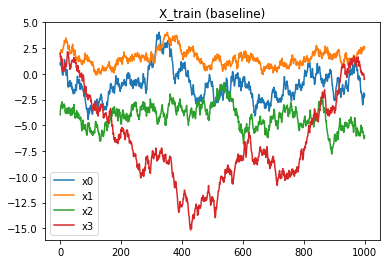

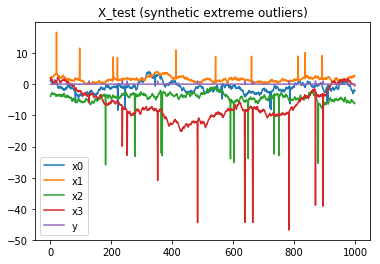

  0%|          | 0/4 [00:00<?, ?it/s]

INFO:tensorflow:Restoring parameters from /tmp/tmpkewz4z4i/variables.dat-400


 25%|██▌       | 1/4 [00:04<00:14,  4.89s/it]

INFO:tensorflow:Restoring parameters from /tmp/tmpn2yz585y/variables.dat-400


 50%|█████     | 2/4 [00:10<00:10,  5.02s/it]

INFO:tensorflow:Restoring parameters from /tmp/tmpf39088h2/variables.dat-500


 75%|███████▌  | 3/4 [00:15<00:05,  5.16s/it]

INFO:tensorflow:Restoring parameters from /tmp/tmp66e5qecd/variables.dat-100


100%|██████████| 4/4 [00:20<00:00,  5.11s/it]


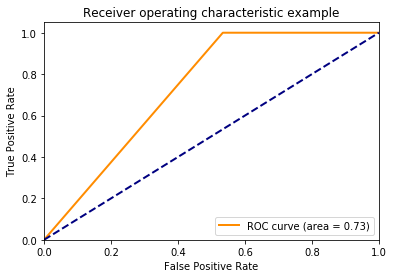

    name  accuracy  precision  recall  F1-score
0  Donut  0.472191   0.021053     1.0  0.041237


In [2]:
data_generator = synthetic_data_generator()
X_train, y_train, X_test, y_test = data_generator.generate_outliers("extreme")

y_predictions = []

working_models = ["Donut"]
donut = Donut()
donut.fit(X_train, np.zeros(len(X_train)))
y_pred, prediction_mask = donut.predict(X_test)
y_pred_clean = y_pred[prediction_mask]
y_test_clean = y_test[prediction_mask]
y_predictions.append(y_pred_clean)
evaluate(y_test_clean.values, y_predictions, working_models)